In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import tensorflow as tf

In [2]:
outdoor_designs = tf.keras.utils.image_dataset_from_directory('/opt/JupyterNotebooks/home-styles/Outdoor/interior-designs', batch_size=64, label_mode='categorical')

Found 187991 files belonging to 19 classes.


In [3]:
outdoor_class_names = outdoor_designs.class_names
for i, class_name in enumerate(outdoor_class_names):
    print(f"Class name: {class_name}, Integer label: {i}")

Class name: Asian, Integer label: 0
Class name: Coastal, Integer label: 1
Class name: Contemporary, Integer label: 2
Class name: Craftsman, Integer label: 3
Class name: Eclectic, Integer label: 4
Class name: Farmhouse, Integer label: 5
Class name: French-Country, Integer label: 6
Class name: Industrial, Integer label: 7
Class name: Mediterranean, Integer label: 8
Class name: Mid-Century-Modern, Integer label: 9
Class name: Modern, Integer label: 10
Class name: Rustic, Integer label: 11
Class name: Scandinavian, Integer label: 12
Class name: Shabby-Chic, Integer label: 13
Class name: Southwestern, Integer label: 14
Class name: Traditional, Integer label: 15
Class name: Transitional, Integer label: 16
Class name: Tropical, Integer label: 17
Class name: Victorian, Integer label: 18


In [4]:
import numpy as np

data_iterator = outdoor_designs.as_numpy_iterator()

In [5]:
batch = data_iterator.next()

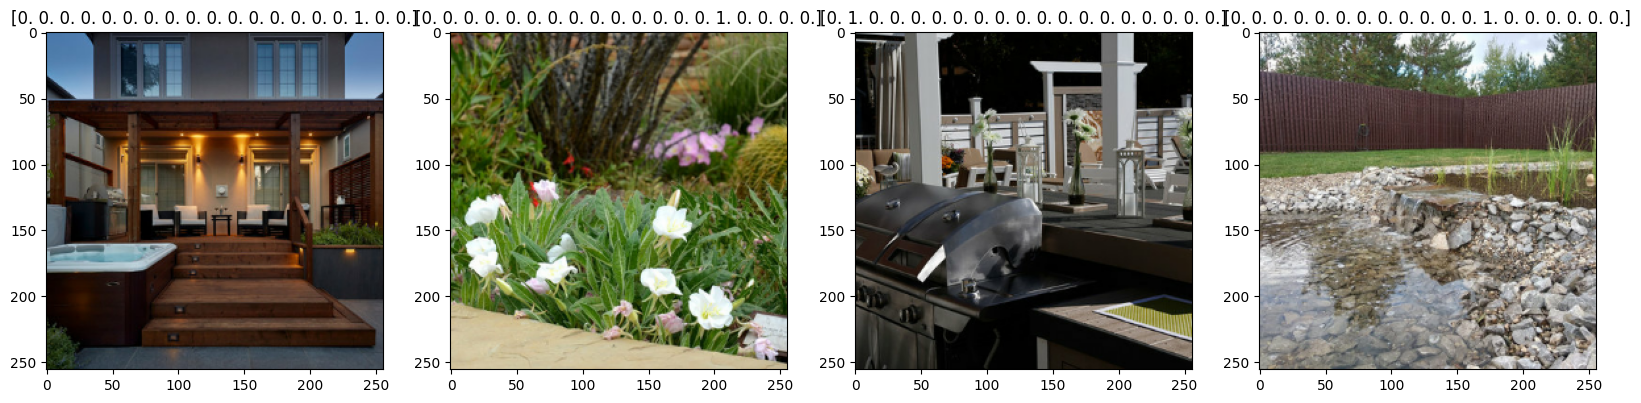

In [6]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [8]:
#Normalization of the images
outdoor_designs = outdoor_designs.map(lambda x, y: (x / 255.0, y))

In [9]:
train_size = int(len(outdoor_designs)*.8)
val_size = int(len(outdoor_designs)*.2)

train = outdoor_designs.take(train_size)
val = outdoor_designs.skip(train_size).take(val_size)

In [10]:
def image_augmentation(image, label):
    image = tf.image.random_brightness(image, max_delta=0.1)
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_hue(image, 0.2)
    image = tf.image.random_saturation(image, 0.5, 1.0)
    return image, label

In [11]:
augmented_train = train.map(image_augmentation)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


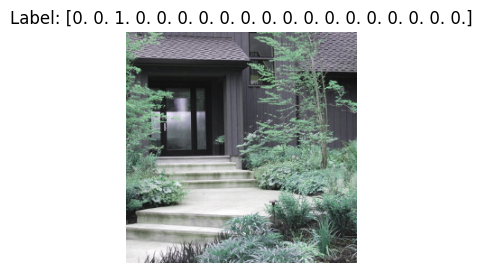

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


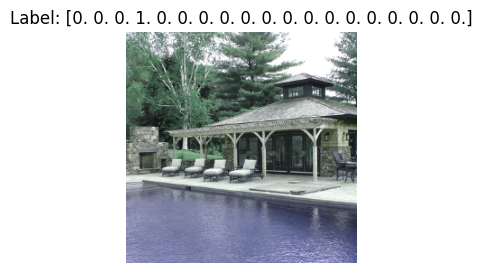

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


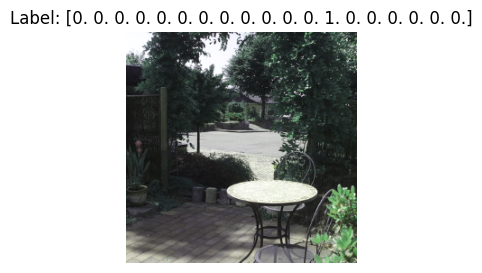

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


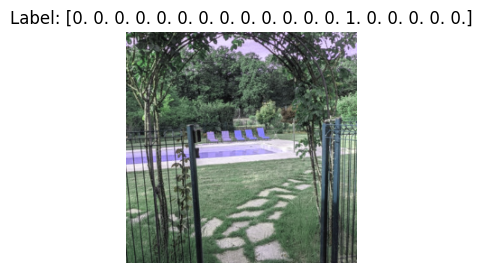

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


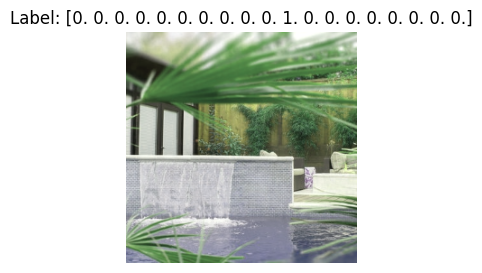

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


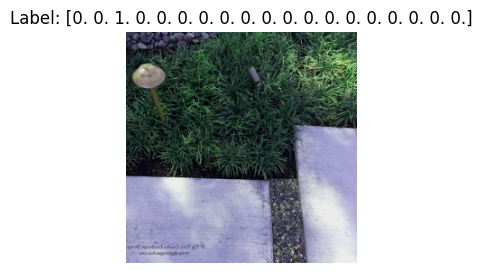

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


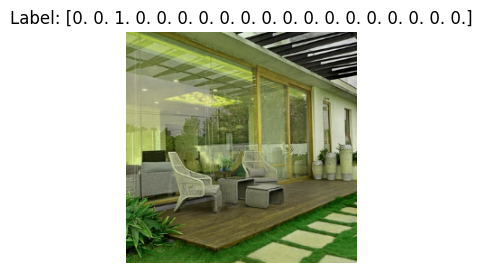

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


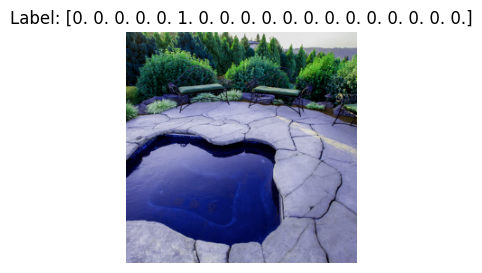

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


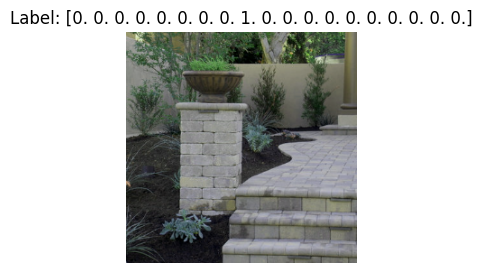

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


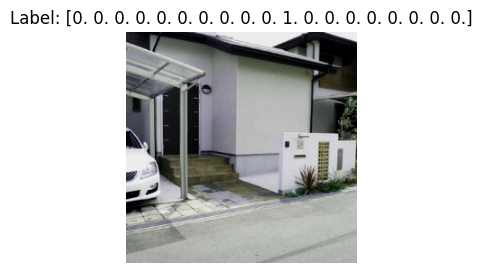

In [12]:
# Visualizing the augmented training dataset
for images, labels in augmented_train.take(2):
    for i in range(min(5, len(images))):
        image = images[i].numpy() 
        label = labels[i].numpy()
        plt.subplots(figsize=(3,3))
        plt.imshow(image)
        plt.title(f'Label: {label}')
        plt.axis('off')  # Hide axes
        plt.show()

In [13]:
def plot_history(history):
    # Figure Configuration to show two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))
    # Plot one to visualize the loss from the history
    ax1.plot(history.history['loss'], label='loss')
    ax1.plot(history.history['val_loss'], label='val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary Crossentropy')
    ax1.grid(True)
    ax1.legend(['Loss', 'Val_Loss'])
    # Plot two to visualize the accuracy from the history
    ax2.plot(history.history['accuracy'], label='accuracy')
    ax2.plot(history.history['val_accuracy'], label='val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.grid(True)
    ax2.legend(['Accuracy', 'Val_Accuracy'])
    plt.show()

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
def train_model(filter_1, filter_2, filter_3, kernel, num_of_epochs, training_dataset, validation_dataset):
    model = Sequential()
    model.add(Conv2D(filter_1, (kernel,kernel), 1, activation='relu', input_shape=(256,256,3)))
    model.add(MaxPooling2D())
    model.add(Conv2D(filter_2, (kernel,kernel), 1, activation='relu'))
    model.add(MaxPooling2D())
    model.add(Conv2D(filter_3, (kernel,kernel), 1, activation='relu'))
    model.add(MaxPooling2D())
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(19, activation='softmax'))
    model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
    model.summary()
    logdir = 'logs'
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
    history = model.fit(training_dataset, epochs=num_of_epochs, validation_data=validation_dataset, callbacks=[tensorboard_callback])
    return model, history

In [15]:
model, history = train_model(32, 64, 64, 5, 7, augmented_train, val)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 252, 252, 32)   │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 126, 126, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 122, 122, 64)   │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 61, 61, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 57, 57, 64)     │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    12,845,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 19)             │         4,883 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,006,355 (49.62 MB)

 Trainable params: 13,006,355 (49.62 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


I0000 00:00:1716348154.217103     695 service.cc:145] XLA service 0x7f6c90006040 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1716348154.217176     695 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce GTX 1080, Compute Capability 6.1


   1/2350 ━━━━━━━━━━━━━━━━━━━━ 9:17:10 14s/step - accuracy: 0.0469 - loss: 0.6876

I0000 00:00:1716348166.152131     695 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2350/2350 ━━━━━━━━━━━━━━━━━━━━ 662s 276ms/step - accuracy: 0.1427 - loss: 0.1995 - val_accuracy: 0.1482 - val_loss: 0.1966
Epoch 2/10
2350/2350 ━━━━━━━━━━━━━━━━━━━━ 524s 223ms/step - accuracy: 0.1528 - loss: 0.1943 - val_accuracy: 0.1533 - val_loss: 0.1934
Epoch 3/10
2350/2350 ━━━━━━━━━━━━━━━━━━━━ 530s 225ms/step - accuracy: 0.1549 - loss: 0.1928 - val_accuracy: 0.1549 - val_loss: 0.1923
Epoch 4/10
2350/2350 ━━━━━━━━━━━━━━━━━━━━ 531s 226ms/step - accuracy: 0.1590 - loss: 0.1917 - val_accuracy: 0.1597 - val_loss: 0.1915
Epoch 5/10
2350/2350 ━━━━━━━━━━━━━━━━━━━━ 524s 223ms/step - accuracy: 0.1662 - loss: 0.1904 - val_accuracy: 0.1627 - val_loss: 0.1915
Epoch 6/10
2350/2350 ━━━━━━━━━━━━━━━━━━━━ 523s 222ms/step - accuracy: 0.1735 - loss: 0.1889 - val_accuracy: 0.1660 - val_loss: 0.1908
Epoch 7/10
2350/2350 ━━━━━━━━━━━━━━━━━━━━ 524s 223ms/step - accuracy: 0.1852 - loss: 0.1867 - val_accuracy: 0.1640 - val_loss: 0.1923
Epoch 8/10
2350/2350 ━━━━━━━━━━━━━━━━━━━━ 524s 223ms/step - accuracy: 0.1

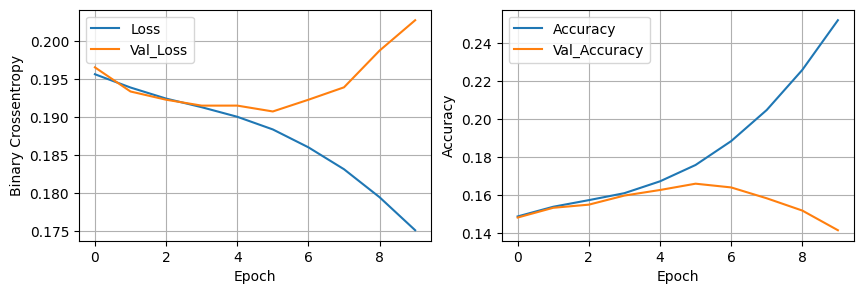

In [16]:
plot_history(history)

In [17]:
model.save('/opt/JupyterNotebooks/house-styles-models/outdoor-style-classification-model.keras')